# Modeling and simulation with partial differential equations
### Linnéuniversitetet
Student: Fill in name of all members and student code

## Instructions

In this computer lab, we give a short overview of Python for Scientific Computing programming. Particularly we illustrate the functionality of the numpy, matplotlib and scipy libraries. In addition, this notebook may serve as a quick reference for the methods used throughout the course. 

In the text-fields or cells you will find short Python scripts that illustrate some of the concepts to be used in the course. You can run the scripts by clicking on the cells and pressing Shift+Enter, to obtain output results below the cell. Short exercises are included with the aim of reinforcing and illustrating concepts introduced in the course. 
You are required to submit solutions to all the exercises presented in this notebook.
**The deadline for hand in your solutions is Friday September 15th**.

We use some examples from the complete Python Introduction book by Hans Petter Langtangen, available at:  
https://hplgit.github.io/primer.html/doc/pub/half/book.pdf

## Computer lab 1: Brief introduction to Python

Let us begin with an simple model for describing the kinematics of a ball thrown vertically upwards with MKS (meter, Kilogram, second) units.
We present a script below for computing the displacement `y` corresponding to the input period `t` of movement, when the ball is thrown from the reference point $y=0$. We declare the variables `v0` as initial vertical speed and `g` as the gravitational constant.
Click on the text-field below and press "Run" to compute the cell for the given data.

In [1]:
v0 = 10
g = 9.81
t = 1.0
y = v0*t - 0.5*g*t**2
print ('At t=',t,' s, the height of the ball is ',y,' m.')

At t= 1.0  s, the height of the ball is  5.095  m.


This example shows a simple way of outputting results by using the print method. The computed position `y` at time `t` is printed in screen by using the function print. Objects that are enclosed by ' or " are denoted strings and are basically text to be printed on screen. 

In this course we use specific mathematical operations as the operator $*$, which denotes product and t$**$2, which is used for the operation $t^2$. There exist several python libraries that provide definitions of functions and other basic routines. We use NumPy (Numerical Python), for the evaluation of standard mathematical functions.

Similarly, we can compute the time spent during the ball's movement until it reaches the height `yc` as illustrated below.

In [2]:
v0 = 10
g = 9.81
yc = 1

import numpy
t1 = (v0 - numpy.sqrt(v0**2 - 2*g*yc))/g
t2 = (v0 + numpy.sqrt(v0**2 - 2*g*yc))/g
print('At t=',t1,'s and,',t2,'s, the ball reaches the height yc=',yc,'m.') 

At t= 0.10545470031833197 s and, 1.93328128337178 s, the ball reaches the height yc= 1 m.


### Exercise 1:
- Modify the data (v0,yc) and compute new values for y, t1, t2. 
- Let `v0 = 10` and `g = 9.81`. For the given input parameters, what is the ball's maximum height? Verify in your code that for such `yc` then `t1=t2`.

In [98]:
import numpy as np
import scipy 
v0 = 10
g = 9.81
def f(x): return v0*x - 0.5*g*x**2
x_max = scipy.optimize.fmin(lambda x: -f(x), 0)
print(x_max)
y_c = f(x_max)
print(y_c)
t1 = (v0 - numpy.sqrt(v0**2 - 2*g*yc))/g
t2 = (v0 + numpy.sqrt(v0**2 - 2*g*yc))/g
print(f't1:{t1}, t2:{t2}')

Optimization terminated successfully.
         Current function value: -5.096840
         Iterations: 25
         Function evaluations: 50
[1.019375]
[5.09683996]
t1:[-0.09729433], t2:[2.13603032]


Notice that we are required to type numpy on every function call. 
This is a good idea because typing the package name give us control on what functionality we are using.
There exist several different packages with similar definitions but that may offer different functionality. 

We can improve readability by relabeling numpy as just "np". Below we show the usage of standard functions and constants:

In [ ]:
import numpy as np

x = np.pi/2
f1 = np.sin(x)
f2 = np.log(5)
f3 = np.sin(x)*np.cos(x) + np.log(x)
print ('f1=',f1,', f2=',f2,', f3=',f3)

### Exercise 2:
- In this task we use common mathematical definitions and compare alternative representations of the function $f(x)=\sinh(x)$ evaluated at the point x=$\pi$.

a) Implement an alternative version of $\sinh (x)$ by using the following definition: 
$$\sinh (x)=\tfrac{1}{2}({e^{x}-e^{-x}}),$$
denote $f_1$ the result of using the definition by employing `np.exp(x)`.
Similarly, denote $f_2(x)$ the result of using the definition by employing now `np.e**(x)`.

b) Check the residuals $R_1=|\sinh (x)-f_1|$ and $R_2=|\sinh (x)-f_2|$.

Are the new definitions numerically equivalent? Describe your results.

In [38]:
# a)
x = np.pi
f1 = 0.5*(np.exp(x)-np.exp(-x))
f2 = 0.5*(np.e**(x)-np.e**(-x))
# b)
R1 = np.abs(np.sinh(x)-f1)
R2 = np.abs(np.sinh(x)-f2)
print(f'f1:{f1}, f2:{f2}')
print(f'R1:{R1}, R2:{R2}')
# R1 är det men inte R2. Pga numeriska skillnader

f1:11.548739357257748, f2:11.548739357257746
R1:0.0, R2:1.7763568394002505e-15


We compute in complex arithmetic by using the imaginary unit `1j` or adding `j` to a number to specify it's imaginary part. Notice in the example below how we access the real or imaginary part of a complex number. Lets verify Euler's formula: $$e^{ix}=\cos x + i\sin x$$

In [39]:
x = 3                        # some arbitrary number
z1=np.exp(1j*x)              # exponential representation
z2=np.cos(x) + 1j*np.sin(x)  # trigonometric representation
print ("z1=",z1,", z2=",z2,", |z1-z2|=",np.abs(z1-z2), ", Re z1=", z1.real, ", Im z2=", z2.imag)

z1= (-0.9899924966004454+0.1411200080598672j) , z2= (-0.9899924966004454+0.1411200080598672j) , |z1-z2|= 0.0 , Re z1= -0.9899924966004454 , Im z2= 0.1411200080598672


We can also define our own functions as illustrated below:

In [40]:
def f(x):
    return np.exp(-x)*np.cos(x)

print ('f(2)=',f(2.0),', f(5)=',f(5.0),', f(2*pi)=',f(2.0*np.pi))

f(2)= -0.05631934999212789 , f(5)= 0.0019113007712959706 , f(2*pi)= 0.0018674427317079893


In the lectures we deal with a special class of functions denoted piecewise functions. 
These consist in multiple sub-functions, where each sub-function applies to a specific region of the domain. Consider the following example:

In [41]:
def f(x):
    if 0 <= x <= 1:
        value = x*(1-x)
    else:
        value = 0
    return value

print('f(0.5)=',f(0.5),', f(4)=',f(4))

f(0.5)= 0.25 , f(4)= 0


Here $f(x)=x(1-x)$ when $0\leq x \leq 1$, otherwise $f(x)=0$. 

In the code we implemented a piecewise function by using a conditional for the value of $x$. The syntax corresponds to standard `if` and `else` clauses. In the case when we might have more cases to evaluate, we can use the syntax `elif`, which is used as `else if`. Notice that indentation (tab spaces) is important in Python.

### Exercise 3: 
- Write a mathematical expression for the piecewise function presented in the last piece of code. Complete the following template

$$
f(x):=\left\{
\begin{array}{ll}
... , &  \text {subdomain} \quad x \\
... , &  \text {subdomain} \quad x
\end{array}
\right. 
$$

- Implement a script for the evaluation of the following piecewise function: 
$$
f(x):=\left\{
\begin{array}{ll}
\sin(x), & x<0\\
x,     & 0\leq x \leq 1 \\
1, & x>1
\end{array}
\right. 
$$
Evaluate this function for the values $x=-\pi/3,1/2,1,2$.


In [56]:
def f(x):
    if x < 0:
        value = np.sin(x)
    elif 0 <= x <= 1:
        value = x
    elif x > 1:
        value = 1
    return value
print(f'-pi/3:{f(-np.pi/3)}, 1/2:{f(1/2)}, 1:{f(1)}, 2:{f(2)}')
#print('f(0.5)=',f(0.5),', f(4)=',f(4))

-pi/3:-0.8660254037844386, 1/2:0.5, 1:1, 2:1


### Exercise 4: 
- In the following script, we plot $f(x,y):=x(1-x)\sin(\pi y)$ for $0\leq x,y \leq 1$. Modify this code, for plotting: $
f(x,y):=
\sin(\pi x/2)\sin (\pi y),
$
in the domain $-2 \leq x,y \leq 2$.

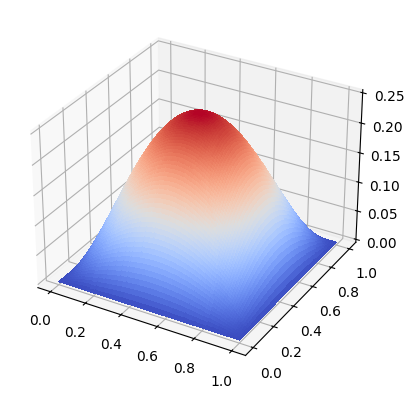

In [61]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

N=101

# Define grid points
x = np.linspace(0, 1, N+1)
y = np.linspace(0, 1, N+1)
#x = np.linspace(-2, 2, N+1)
#y = np.linspace(-2, 2, N+1)

X, Y = np.meshgrid(x, y)

F=X*(1-X)*np.sin(np.pi*Y)
#F = np.sin((np.pi*X)/2)*np.sin(np.pi*Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, F, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

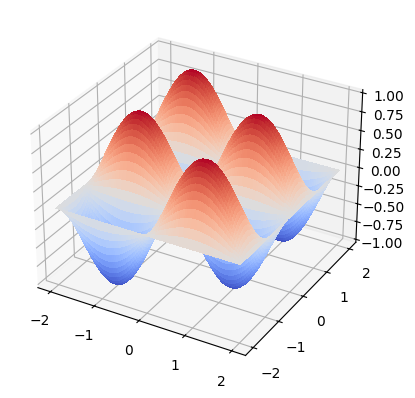

In [62]:
N=101

# Define grid points
#x = np.linspace(0, 1, N+1)
#y = np.linspace(0, 1, N+1)
x = np.linspace(-2, 2, N+1)
y = np.linspace(-2, 2, N+1)

X, Y = np.meshgrid(x, y)

#F=X*(1-X)*np.sin(np.pi*Y)
F = np.sin((np.pi*X)/2)*np.sin(np.pi*Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, F, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

## Arrays

We use arrays to store numerical values in a compact way. In the next example we introduce the array `temp` containing elements that denote temperature in Celsius. Then, we output the conversion table with equivalence in Fahrenheit:

In [60]:
temp = np.array([-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
print ('    C    F')
for C in temp:
    F = (9.0/5.0)*C + 32.0
    print ('%5d %5.1f' % (C,F))

print ('\nThe temp list has', len(temp), 'elements')

    C    F
  -20  -4.0
  -15   5.0
  -10  14.0
   -5  23.0
    0  32.0
    5  41.0
   10  50.0
   15  59.0
   20  68.0
   25  77.0
   30  86.0
   35  95.0
   40 104.0

The temp list has 13 elements


In the last example, we have defined the array `temp` explicitly by listing each entry from its creation. For the conversion, we used a loop to operate each element of the array and get the respective converted data. Finally we access the array size by using: `len(temp)`.

We can access several elements of the array in compact notation by using index operations.
In this way, we can obtain sub arrays from performing index operations. This special feature allows us to omit looping over array elements and improves readability of the code. 
For this consider the following task.

### Exercise 5: 
- Experiment in the blank below the output of the following cases:
`temp[2:]`, `temp[1:3]`, `temp[:3]`, `temp[1:-1]`, `temp[6:-2]` and briefly describe your observations giving reference to the original array.

In [88]:
print(temp)
print(temp[2:]) # Börjar på index 2(index0 är först)
print(temp[1:3]) # Börjar på index 1 och slutar innan index 3
print(temp[:3]) # Skriver ut 3 första
print(temp[1:-1]) # Alla utom första och sista

[-20 -15 -10  -5   0   5  10  15  20  25  30  35  40]
[-10  -5   0   5  10  15  20  25  30  35  40]
[-15 -10]
[-20 -15 -10]
[-15 -10  -5   0   5  10  15  20  25  30  35]


The package numpy offers a great deal of functions that allow arrays as input argument. 
The next code illustrates the so-called vectorized operations. 

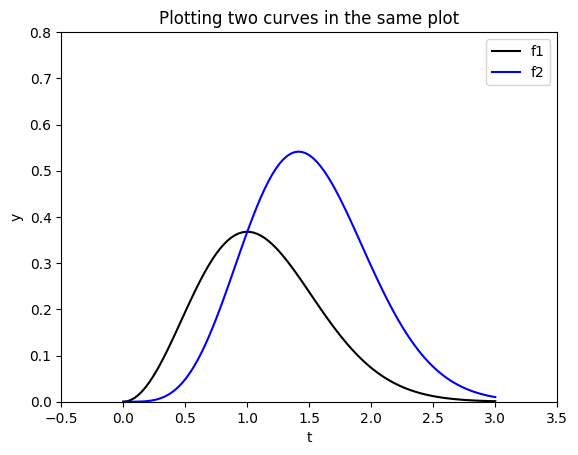

In [68]:
import numpy as np
from matplotlib.pylab import *

N=101

def f1(t):
    return t**2*np.exp(-t**2)

def f2(t):
    return t**2*f1(t)

t = np.linspace(0, 3, N) # t is now an array/vector

y1 = zeros(len(t))
y2 = zeros(len(t))

for i in range(len(t)): # compute f1(t) by using an index i in a loop
    y1[i] = f1(t[i])

y2 = f2(t)              # compute f2(t) for each element of t in a single function call

# Plotting
plot(t, y1, 'k-')
#hold(True)
plot(t, y2, 'b-')
#hold(False)

title('My First Matplotlib Demo')
xlabel('t')
ylabel('y')
legend(['f1', 'f2'])
title('Plotting two curves in the same plot')

# fixing the output window
axis([-0.5, 3.5, 0.0, 0.8]) # [tmin, tmax, ymin, ymax]
show ()

### Exercise 6: 
- Modify the last plotting routine in order to plot the functions $f_1=e^{-t^2/4}$ and $f_2=e^{-t^2/4}\sin 4t$ for $-2\pi<t<2\pi$.

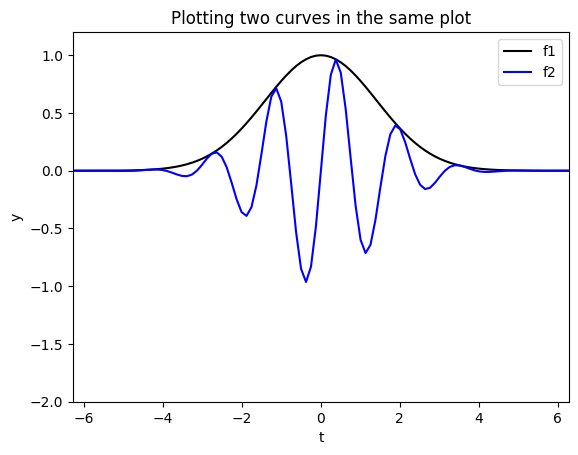

In [74]:
import numpy as np
from matplotlib.pylab import *

N=101

def f1(t):
    return np.exp((-t**2)/4)

def f2(t):
    return np.exp((-t**2)/4)*np.sin(4*t)

t = np.linspace(-2*np.pi, 2*np.pi, N) # t is now an array/vector
#np.linspace(0, 3, N) # t is now an array/vector

y1 = zeros(len(t))
y2 = zeros(len(t))

for i in range(len(t)): # compute f1(t) by using an index i in a loop
    y1[i] = f1(t[i])

y2 = f2(t)              # compute f2(t) for each element of t in a single function call

# Plotting
plot(t, y1, 'k-')
#hold(True)
plot(t, y2, 'b-')
#hold(False)

title('My First Matplotlib Demo')
xlabel('t')
ylabel('y')
legend(['f1', 'f2'])
title('Plotting two curves in the same plot')

# fixing the output window
axis([-np.pi*2, np.pi*2, -2, 1.2]) # [tmin, tmax, ymin, ymax]
show ()

In the script below, we output some of the most common types of arrays and matrices:

In [75]:
print('\nA row with ones: ')
print((np.ones(5)))
print('\nA column with zeros: ')
print(np.zeros((3,1))) # notice the double brakets
print('\nA rectangular matrix: ')
print(np.zeros((4,2))) # notice the double brakets
print('\nA 3x3 identity matrix: ')
print((np.eye(3)))
print('\nA diagonal matrix: ')
print(np.diag((1,2,3,4)))


A row with ones: 
[1. 1. 1. 1. 1.]

A column with zeros: 
[[0.]
 [0.]
 [0.]]

A rectangular matrix: 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

A 3x3 identity matrix: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

A diagonal matrix: 
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Similarly, we can perform common matrix operations:

In [76]:
A=np.array([[1,1],[2,1]])
B=np.array([[0,1],[2,0]])
x=np.ones(2)

print('The determinant of A is: ')
print(np.linalg.det(A))
print('The l2-norm of A is: ')
print(np.linalg.norm(A))
print('B transpose is: ')
print((B.T))
print('The sum A+B is: ')
print((A+B))
print('Addition by scalar is: ')
print((A-1))
print('Product by scalar is: ')
print((2*B))
print('Matrix vector product is: ')
print((A.dot(x)))
print('Matrix product is: ')
print((A.dot(B)))

The determinant of A is: 
-1.0
The l2-norm of A is: 
2.6457513110645907
B transpose is: 
[[0 2]
 [1 0]]
The sum A+B is: 
[[1 2]
 [4 1]]
Addition by scalar is: 
[[0 0]
 [1 0]]
Product by scalar is: 
[[0 2]
 [4 0]]
Matrix vector product is: 
[2. 3.]
Matrix product is: 
[[2 1]
 [2 2]]


### Exercise 7:
Declare and print the following matrices
- A 4x4 diagonal matrix with diagonal filled with the value 5.
- The matrix
$$
\left[
    \begin{array}{cccc}
         2 &-1 & 0 & 0 \\
        -2 & 3 &-1 & 0 \\
         0 &-2 & 3 &-1 \\
         0 & 0 &-2 & 2
    \end{array}
\right]
$$
- The matrix  $$B=\frac{1}{\text{det}(A)^2}A*A^\top.$$

In [90]:
# 1
print(np.diag((5,5,5,5)))
# 2
print(np.matrix([[2,-1,0,0],[-2,3,-1,0],[0,-2,3,-1],[0,0,-2,2]]))
A=np.array([[1,1],[2,1]])
# 3
kvadrat = np.square(A)
determinant = np.linalg.det(kvadrat)
kvot = A/determinant
trans = A.T
B = kvot*trans
print(B)

[[5 0 0 0]
 [0 5 0 0]
 [0 0 5 0]
 [0 0 0 5]]
[[ 2 -1  0  0]
 [-2  3 -1  0]
 [ 0 -2  3 -1]
 [ 0  0 -2  2]]
[[-0.33333333 -0.66666667]
 [-0.66666667 -0.33333333]]


Important matrix operations are inversion of a matrix and the solution of linear systems. Below, we give examples of these operations.

We verify the identity $A^{-1}A=I$ with a simple example.

In [86]:
A=np.array([[1,1],[2,1]])

Ainv=np.linalg.inv(A)
print('\nWe check the inverse:')
print((Ainv))
print('\nWe verify the identity:')
print((Ainv.dot(A)))


We check the inverse:
[[-1.  1.]
 [ 2. -1.]]

We verify the identity:
[[1. 0.]
 [0. 1.]]


A tridiagonal matrix has nonzero elements only on the main diagonal, the diagonal on top of the main diagonal, and the diagonal below the main diagonal.
For the last task we assemble a tridiagonal matrix $A$ and a load vector $b$ filled with random elements. Pay special attention to how we assemble the tridiagonal matrix. Consecutively, we find $x$ such that the corresponding system: $Ax=b$ is satisfied.

In [92]:
from scipy.sparse import spdiags
n=8
d=np.ones(n); #
data = np.array([-d,2*d,-d])
diags = np.array([-1, 0, 1])
A=spdiags(data, diags, 8, 8).toarray()
print('A is a banded matrix:')
print(A)

b=np.random.rand(n,1)  # vector filled with random elements
x=np.linalg.solve(A,b) # solving the system Ax=b
print('\nThe solution x is:')
print(x)

print('\nThe l2-norm ||x|| is:')
print(np.linalg.norm(x))

A is a banded matrix:
[[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.]]

The solution x is:
[[2.32344672]
 [4.05284757]
 [5.29599146]
 [6.04796338]
 [5.91649365]
 [5.50800494]
 [4.33888261]
 [2.35342883]]

The l2-norm ||x|| is:
13.272411600927745


### Exercise 8:
- Given the residual `r=b-A*x`, compute the quantity $E=||b-Ax||/||x||$. Here, we denote the l2 norm of $x$ as $||x||$. Based on your resulting $E$, answer the following question: Is the numerically computed `x` a good solution to the system $Ax=b$? Motivate your answer.

In [95]:
# Vad är E?
r = np.linalg.norm(b-A*x)
lin = np.linalg.norm(x)
r/lin

np.float64(2.4600300982795624)

Additionally, after assembly we can modify the entries of a matrix:

In [ ]:
print('The element A00=',A[0,0])
A[-1,-1]=1 # we modify the last element of A
print('The modified matrix is:\n',A)

We can also use index notation to extract submatrices. However, the following example demostrates an important concept in programming languages: 
We can copy by reference and by value. For this let's extract a sub matrix from A:

In [ ]:
sub=np.copy(A[4:,4:]) # we extract a sub matrix from A
print(sub)
sub[-1,-1]=10 # we modify sub
print('Lets check A:')
print(A)       

Notice that we have used sub=np.copy(A[4:,4:]), which creates a submatrix and copies its entries by value.

## Loops

We now turn into loops, which are very useful for numerical computations in general. In the example below, we loop and index $i$ along `range(-2,3)`, which represents the values i=-2,-1,0,1,2. Notice that in the example the index does not reach the end value `i=3`.

In [ ]:
for i in range(-2, 3):
    print (i)

We modify the last example such that `i=0` is not printed:

In [ ]:
for i in range(-2, 3):
    if i!=0:
        print (i)

The statement `i != 0` is used as the logical statement: `i` is not equal to `0`.
Alternatively, `i == 0` can be used as: `i` is equal to `0`.

### Exercise 9:
- Modify the last for loop, such that it prints "Hello World!" when $i$ is 2.

In [96]:
for i in range(-2, 3):
    if i==2:
        print (i, 'Hello World!')

2 Hello World!


Additionally, we can work with nested loops as we illustrate below:

In [ ]:
for i in range(1, 5):
    for j in range(i):
        print (i, j)

Observe that in python, indices start from zero and the statement "j in range(i)" gives j=0,...,i-1. This is an important difference from other scripting languages. Keep this in mind when writing your scripts.


### Exercise 10:
- Modify the last for loop, such that your code prints the output only if $i+j>3$.

In [97]:
for i in range(1, 5):
    for j in range(i):
        if i+j>3:
            print (f'{i+j}, {i}, {j}')

4, 3, 1
5, 3, 2
4, 4, 0
5, 4, 1
6, 4, 2
7, 4, 3


Loops are typically used in approximations of a function around a given point. We consider the Taylor approximation of $\sin(x)$ around $x=0$. The following script outputs an approximation of $\sin x$ by the first three terms: $\sin x\approx x-x^3/3!+x^5/5!$.
We evaluate the approximation at the point $x=1$.

In [99]:
import math as mt # importing factorial
x = 1.0  # assign some value
j = 0    # index
s = 0
sign = 1.0

while j < 3:
    k = 2*j+1
    term = sign*x**k/mt.factorial(k)
    s = s + term
    j += 1
    sign = -sign

print ('sin(',x,') = ',np.sin(x),', series (',x,')=',s, ', residual =',np.abs(np.sin(x)-s), ' (approx with ',j,' terms)')

sin( 1.0 ) =  0.8414709848078965 , series ( 1.0 )= 0.8416666666666667 , residual = 0.0001956818587701692  (approx with  3  terms)


### Exercise 11:
- For $0\leq x \leq \pi$, plot $\sin x$ and the resulting approximation given above.
- Extend the script above to evaluate the Taylor approximation for $N$ terms. Plot the computed residual at $x=1$ from your results in a logarithmic scale vs N (matplotlib.pyplot.semilogy).

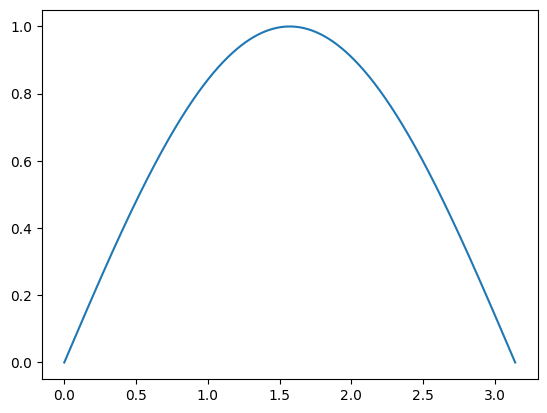

In [100]:
def f(x):
    return np.sin(x)
x = np.linspace(0, np.pi, 1000)
y = f(x)
plt.plot(x,y)

### Exercise 12:
- Use the script above to evaluate $\pi\approx s_N= 4\sum_{k=1}^N \frac{(-1)^{k+1}}{2k-1}$, by using different values for $N=3,4,5,\ldots$. It is illustrative to asses the convergence of the approximation towards $\pi$. For this, plot the computed residual $|s_N-\pi|$ from your results in a logarithmic scale vs N, for $N=1,2,\ldots$
- Find a value for $N$ such that the residual is smaller than $10^{-2}$.

## Numerical integration

A discussion of numerical integration will be given in the second part of the course. 
For now, we briefly illustrate numerical integration by using the composite Simpson rule.
Basically, we want to compute numerically the integral $\int_a^b f(x)\,dx$ and we split the interval $[a,b]$ in $N$ divisions (partitions). Then, we employ the Simpson rule in each partition and add the results. Finally, we compare the approximation for different N against the exact value of the integral as illustrated below:

In [ ]:
import numpy as np
# numerical integration example
def Simpson(f, a, b, n=100):
    h = (b - a)/float(n)
    sum1 = 0
    for i in range(1, int(n/2) + 1):
        sum1 += f(a + (2*i-1)*h)
    sum2 = 0
    for i in range(1, int(n/2)):
        sum2 += f(a + 2*i*h)
    integral = (b-a)/(3*n)*(f(a) + f(b) + 4*sum1 + 2*sum2)
    return integral

def f(x):
    return (3./2)*np.sin(x)**3

print ('Integral f(x) from 0 to pi:')

def application():
    for N in 2, 6, 12, 100, 500:
        approx = Simpson(f, 0, np.pi, N)
        print ('N=%3d, approx=%18.15f, error=%9.2E' % \
            (N, approx, abs(2-approx)))
        
application ()

Remarks:
- The statement float(n) ensures that the division by n gives a decimal number.
- Similarly, int(N/2) truncates the division giving the integer part.
- We have used several function definitions and the excecution is resumed in application () call.
- Notice that the use of print here is slightly different than before. The current form allow us to control the formatting of the text in the classical C standard.

We can directly input a different integrand into `Simpson(...)` and still be able to reuse the code above. 
Take a close look to the following example:

In [ ]:
N=5
approx = Simpson((lambda x: np.exp(x)), 0, 1.0, N)
print ('N=%3d, approx=%18.15f' % (N, approx))

The use of inline functions or lambda functions allows us to define quickly simple functions.

### Exercise 13: 
- Determine the exact value of the integral of the last example by pen and paper. Use your exact value in your code to compute the error of the numerical integration for different $N$. Find how many partitions $N$ we need such that the residual is smaller than $10^{-4}$.
- Verify numerically the value of the improper integral $\sqrt{\pi}=\lim_{L\rightarrow \infty}2\int_{0}^L e^{-x^2} dx$, using $L=10$ for given $N$.
- Find $N$ such that the residual for the Gaussian integral is smaller than $10^{-10}$.

### Exercise 14:
We will be studying convergence of several numerical methods applied to PDEs in the course.
- Repeat the two approximations for $\pi$ (series and improper integral) for $N=2,3,\ldots 1000$ and store the errors in arrays E1 and E2. We want to conclude what strategy converges faster in terms of $N$. 
- Plot the errors E1, E2 vs N in a semilogy. This strategy is useful for comparing convergence of different numerical methods. 

The accuracy of the Simpson rule may be too low for some integrands. As done before, we could use more partitions and get more accurate results. However, higher order methods are expected to converge faster with less function evaluations. Namely, the so-called Gauss quadrature rules are very efficient methods. We can employ ready-to-use quadrature rules as we illustrate below. Compare your calculations above against the following implementation:

In [ ]:
import numpy as np
import scipy.integrate

approx = scipy.integrate.quad(lambda x: 2.0*np.exp(-x**2), 0.0, 10.0, epsabs=1E-9, epsrel=1E-9)[0]

print ('N=%3d, pi=%1.15f, approx=%18.15f, error=%9.2E' % \
            (N, approx*approx, approx, (np.sqrt(np.pi)-approx)))